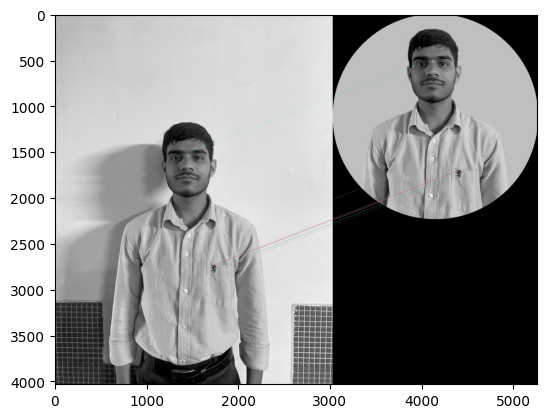

(<matplotlib.image.AxesImage at 0x7e003f42a5c0>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/IMG_5160.png',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/fotor_2023-5-26_21_26_26.png',cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

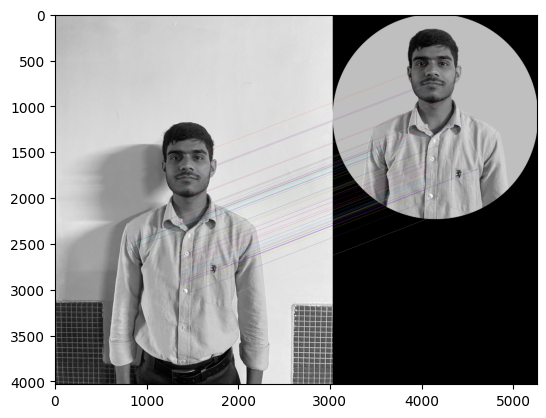

(<matplotlib.image.AxesImage at 0x7e003c586860>, None)

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/IMG_5160.png')
img2 = cv2.imread('/content/fotor_2023-5-26_21_26_26.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

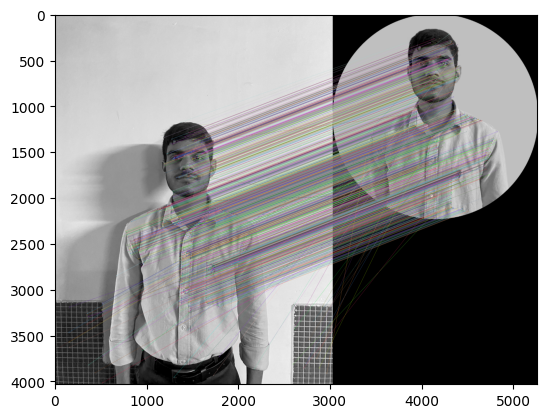

(<matplotlib.image.AxesImage at 0x7e003c5ee0b0>, None)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
image1 = cv2.imread('/content/IMG_5160.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/fotor_2023-5-26_21_26_26.png', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Create FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
output_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=2)

# Display the result
plt.imshow(output_image),plt.show()